# Introductory applied machine learning (INFR10069)

<div align="right"><font color="blue" size="5">Your Score was 64.0 out of a total of 95.0, or 67.4%</font></div>

# Assignment 1: Data analysis and visualisation

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "01_Analysis.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="01_Analysis.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "01_Analysis.ipynb"
```

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

C:\Users\User\Miniconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

## 1. Exploration of the dataset

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [10 marks] ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

<div align="right"><font color="blue" size="4">6.0/10.0</font></div>

In [10]:
# (1) # Your Code goes here:
news_raw_loc = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')
news_raw=pd.read_csv(news_raw_loc)
news_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


<div align="right"><font color="blue" size="4">3.0</font></div>

(2) ***Your answer goes here:***
There are 2129 different documents in the dataset (2129 different indices for the documents.
There are 520 different words in the dataset +1 class column indicating the class in which each document (row index) belongs to.
All the entries for the frequencies of words are of integer data type, as they should.

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 1.2 ---  [6 marks] ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

<div align="right"><font color="blue" size="4">3.0/6.0</font></div>

In [11]:
# (1) # Your Code goes here:
print(news_raw.columns[:15])

Index(['w1_aaa', 'w2_pins', 'w3_kmr', 'w4_notion', 'w5_queens', 'w6_dwyer',
       'w7_defenseman', 'w8_gld', 'w9_tocchet', 'w10_home', 'w11_buying',
       'w12_internet', 'w13_slots', 'w14_compatible', 'w15_transfer'],
      dtype='object')


<div align="right"><font color="blue" size="4">2.0</font></div>

(2) ***Your answer goes here:***
The attributes are the words that might occur in any document(s) in the dataset.
We can clearly see the maximum mutual information of the selected words with the 5 classes, as we can naturally relate each word with one of the classes if we think about the context it is most used in.

<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 1.3 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. 

1. [Code] Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for the raw dataset. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency to better visualise your model). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise. 
 ***N.B.*** *If for some reason, the alpha parameter does not work for you, then ignore it.*

1. [Text] Mention anything peculiar you observe in the Data.

<div align="right"><font color="blue" size="4">4.0/4.0</font></div>

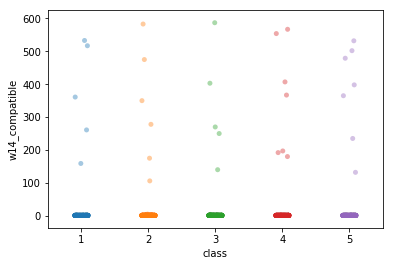

In [12]:
# (1) # Your Code goes here:
ax =  sns.stripplot(x='class',y='w14_compatible', data=news_raw, jitter=True, alpha=.4)

<div align="right"><font color="blue" size="4">2.0</font></div>

(2) ***Your answer goes here:***
There are a few(compared to the many 'normal' data points near zero) high-count occurences of the word in documents of all the 5 selected classes, which is strange considering some topics are off-context and should not be using the word ('compatible') e.g. atheism has a document with over 500 occurences of 'compatible'. These few high-count points are considered to be outliers in the distribution of our data. 

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 1.4  --- [8 marks] ==========
Let us analyse this further. The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of jitter into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. For this, you will be using the function `scatter_jitter` from the `utils` library which we provided. This function takes as input two numpy arrays containing the features of interest. 

1. [Code] First, pick two attributes of your choice from `news_raw` and use the provided function to plot their joint distribution. Do this twice (i.e. pick 4 attributes and do plots between two pairs: you do not need to plot between each possible pair). You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2. Label the axes appropriately.

1. [Text] Do these plots increase or reduce the possibility of the data-set containing outliers? Why or why not? How would you visualise the data to verify this? **N.B. There is no need to code anything for this part, just indicate a reasonable type of plot, and what you expect to see.**

<div align="right"><font color="blue" size="4">8.0/8.0</font></div>

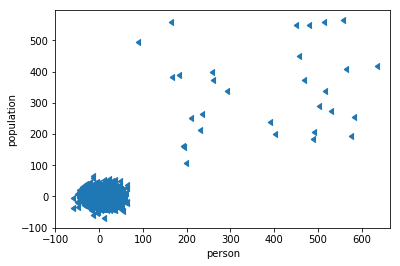

Text(0,0.5,'john')

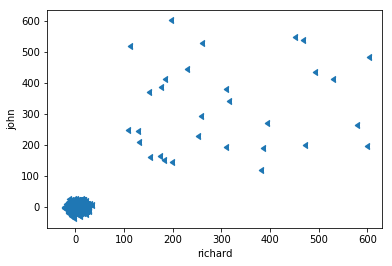

In [13]:
# (1) # Your Code goes here:
s1=scatter_jitter(news_raw['w18_person'],news_raw['w25_population'],jitter=0.4)
plt.xlabel('person')
plt.ylabel('population')
plt.show(s1)
s2=scatter_jitter(news_raw['w66_richard'],news_raw['w107_john'],jitter=0.2)
plt.xlabel('richard')
plt.ylabel('john')

<div align="right"><font color="blue" size="4">4.0</font></div>

(2) ***Your answer goes here:***
The outliers increase in the joint distribution, because if ***one*** of the two attributes is an outlier, then the data point in the joint distribution would ***also*** be an outlier, ***regardless*** of whether the other attribute was an outlier or not.
We can create a **boxplot** to visualise the data (**separately** for each attribute), which will show the quartile representation of data(document occurences) for each attribute to identify the outliers(outside the minimum and maximum values of the attributes).


<div align="right"><font color="blue" size="4">4.0</font></div>

### ========== Question 1.5 --- [15 marks] ==========
We want to get rid of the potential outliers in the data. Your job now is to create a new dataset from `news_raw` (name it `news_clean`) and remove the outliers.

1. [Text] Decide on a criterion to find the outliers and argue why it is reasonable. 
1. [Code] Then implement it and visualise the result (in terms of your criterion). **Be careful** not to alter the original dataset as we will need it later. 
1. [Text] Finally report the number of points in the cleaned dataset, and the number rejected as outliers and comment on the result

<div align="right"><font color="blue" size="4">6.5/15.0</font></div>

(1) ***Your answer goes here:***
A common method to find the outlier data is to center the data around the mean and calculate which data points are scattered  more than a 2-standard-deviation distance around the mean. This is reasonable as most of the data in the distribution will be centered around the mean (a specific word's counts are similar across different documents) and a threshold of 2 standard deviations (which measure how much the data deviates from the mean) is a reasonable threshold to include maximum and minimum values but exclude outliers.

<div align="right"><font color="blue" size="4">1.0</font></div>

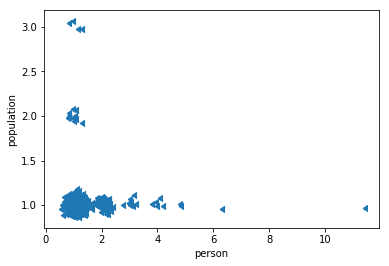

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.6 MB


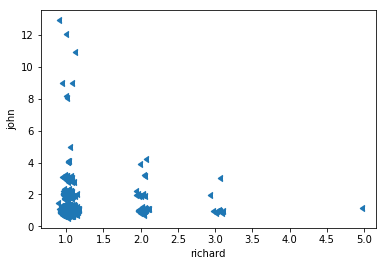

In [14]:
# (2) # Your Code goes here:
news_clean=news_raw.copy()
news_clean=news_clean[(np.abs(news_clean-news_clean.mean()) <= 2*news_clean.std()).all(axis=1)] #this is an 
#expression containing boolean indexing with the values that are within the 3 stds range of the mean (non-outliers)
#and then selecting only those documents for which the attributes (columns, axis=1) contain NO OUTLIERS (.all()) i.e. deleting
#the documents which contain at least one outlier

#visualising the cleaned chosen data(words) to compare the outliers with the data before the filtering.
s1=scatter_jitter(news_clean['w18_person'],news_clean['w25_population'],jitter=0.4)
plt.xlabel('person')
plt.ylabel('population')
plt.show(s1)
s2=scatter_jitter(news_clean['w66_richard'],news_clean['w107_john'],jitter=0.2)
plt.xlabel('richard')
plt.ylabel('john')

news_clean.info() #to compare number of entries and see how many outliers were removed
news_raw.info()

<div align="right"><font color="blue" size="4">4.5</font></div>

(3) ***Your answer goes here:***
There are 2091 points(documents) left in the dataset, and 38 rejected as outliers. That is a reasonable outlier number of documents and there are many legitimate (non-outlier) documents with normal word-counts for all words.

<div align="right"><font color="blue" size="4">1.0</font></div>

# ========== Question 1.6 --- (LEVEL 11) --- [10 marks] ==========

1. [Code] Visualise some of the outlier documents and some of the inlier ones. 
1. [Text] Comment on the observations. Also comment on whether it is appropriate to do such cleaning on just the training data or on the entire data-set (including testing).

(2) ***Your answer goes here:***

## 2. Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [6 marks] ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

<div align="right"><font color="blue" size="4">6.0/6.0</font></div>

In [15]:
# Your Code goes here:
news_train_loc = os.path.join(os.getcwd(), 'datasets', 'train_20news.csv')
news_train=pd.read_csv(news_train_loc)
news_test_loc = os.path.join(os.getcwd(), 'datasets', 'test_20news.csv')
news_test=pd.read_csv(news_test_loc)
display(news_train.describe())
display(news_test.describe())
news_train.info()
news_test.info()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,...,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000
mean,1.025727,1.017627,1.014769,1.008576,1.006193,1.010481,1.026203,1.024297,1.012387,1.084326,...,4.574083,4.464983,4.533111,4.557885,4.531682,4.514531,4.509290,4.521201,4.412577,3.091472
std,0.280109,0.205208,0.172657,0.115206,0.078473,0.134174,0.618880,0.274219,0.153879,0.491139,...,2.283028,2.273922,2.329654,2.292246,2.333558,2.259005,2.287548,2.295995,2.296504,1.395628
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000,6.500000,6.000000,4.000000
max,8.000000,7.000000,5.000000,4.000000,2.000000,4.000000,28.000000,5.000000,4.000000,16.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.000000


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,128.000000,128.000000,128.0,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.007812,1.031250,1.0,1.0,1.007812,1.015625,1.007812,1.039062,1.015625,1.085938,...,4.757812,4.351562,4.593750,4.445312,4.53125,4.453125,4.687500,4.421875,4.531250,3.078125
std,0.088388,0.278847,0.0,0.0,0.088388,0.124507,0.088388,0.291678,0.124507,0.281373,...,2.201453,2.175706,2.438011,2.387001,2.31373,2.383868,2.390104,2.285212,2.370878,1.400840
min,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,2.000000,2.75000,2.000000,2.750000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,3.000000
75%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,6.25000,7.000000,7.000000,6.000000,7.000000,4.000000
max,2.000000,4.000000,1.0,1.0,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,...,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,5.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 1910 to 2037
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 522.0 KB


<div align="right"><font color="blue" size="4">6.0</font></div>

### ========== Question 2.2 --- [4 marks] ==========

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

<div align="right"><font color="blue" size="4">2.0/4.0</font></div>

(1/2) ***Your answer goes here:***
1.The assumption of Naive Bayes is the conditional independence between features(in this case words in documents), meaning that each feature is independent of all other features given a class (document).
2.If we didn't make the Naive Bayes assumption then we would need a way to calculate the probabilities of each feature given the other features (along with the class) and we would end up with large dimensionality using all features and all different combinations. This is commonly known as the 'curse of dimensionality'

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 2.3 --- [8 marks] ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset `news_train`. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

<div align="right"><font color="blue" size="4">5.0/8.0</font></div>

Text(0,0.5,'tek')

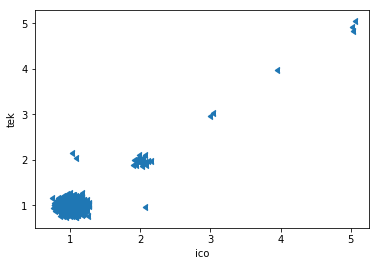

In [16]:
# (1) # Your Code goes here:
s2=scatter_jitter(news_train['w281_ico'],news_train['w273_tek'],jitter=0.4)
plt.xlabel('ico')
plt.ylabel('tek')

<div align="right"><font color="blue" size="4">3.0</font></div>

(2) ***Your answer goes here:***
We observe that these two features (words) are highly (positively) correlated. This means that when one word occurs, it is almost certain that the other word will occur two. 
This normally should impact the Naive Bayes assumption's validity negatively and ,frankly, render it wrong. However, most Naive Bayes Classifiers perform really well, and this is due to the Naive Bayes performing optimally when the ***distribution of dependencies accross classes is evenly distributed*** or even ***when different dependencies cancel each other out***

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 2.4 --- [7 marks] ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

<div align="right"><font color="blue" size="4">6.0/7.0</font></div>

(1) ***Your answer goes here:*** 
A suitable baseline classifier would be to take the mode(most frequent) of the classes of the target (ytrue- the 'class' column) and classify all documents to that class. That would accomplish a baseline (many documents will be classified correctly due to the class being the mode) against which we can compare our own classifier's performance.

<div align="right"><font color="blue" size="4">2.0</font></div>

In [17]:
# (2) # Your Code goes here:
mode=news_train['class'].mode().values #extract the mode of the casses of the training dataset.
Xbase=news_train.drop('class',axis=1) #setting the X set to calculate accuracy
ytrues=news_train['class'] #setting the y_true set to calculate accuracy
ybase=np.ones(news_train.shape[0])*mode  #setting the y_pred set to calculate accuracy
print('baseline accuracy on training data = ',round(accuracy_score(y_true=ytrues,y_pred=ybase),4))

baseline accuracy on training data =  0.213


<div align="right"><font color="blue" size="4">4.0</font></div>

<a id='question_2_5'></a>
### ========== Question 2.5 --- [12 marks] ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

<div align="right"><font color="blue" size="4">8.0/12.0</font></div>

In [18]:
# (1) # Your Code goes here:
classifier=GaussianNB()
X=news_train.drop('class',axis=1)
y=news_train['class']
classifier.fit(X,y)

GaussianNB(priors=None)

<div align="right"><font color="blue" size="4">3.0</font></div>

NB accuracy on train data=  0.878


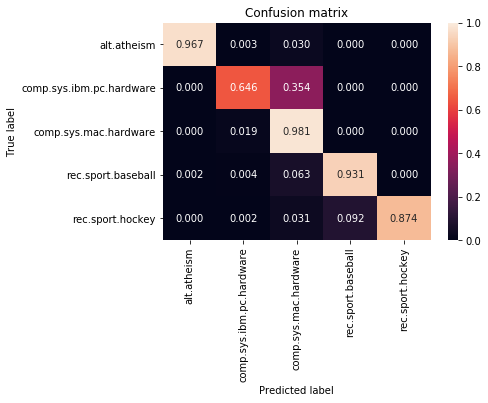

In [19]:
# (2) # Your Code goes here:
print('NB accuracy on train data= ',round(accuracy_score(y_true=y,y_pred=classifier.predict(X)),4))
cmtrain=confusion_matrix(y,classifier.predict(X))
plot_confusion_matrix(cmtrain,classes=['alt.atheism','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware',
'rec.sport.baseball','rec.sport.hockey'])

<div align="right"><font color="blue" size="4">4.0</font></div>

(3) ***Your answer goes here:***
The performance is not similar to that of a state of the art classifier's (>=95%) but is fairly high as pointed out by the above metrics (accuracy~0.88, high true diagonal values in confusion matrix).
The accuracy is not a reasonable measure to use as there are 5 classes and we want to see for each class what the classifier classified wrong and where it was classified. The confusion matrix is a better performance indicator.

<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.6 --- [3 marks] ==========

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

<div align="right"><font color="blue" size="4">1.5/3.0</font></div>

***Your answer goes here:***
There is a relatively high misclassification from the ibm.pc.hardware class to the mac.hardware class. This is due to the two classes having similar words in their documents and should be an anticipated error for our classifier (as seen with words ico and tek). This also occurs in a smaller degree for the classes rec.sport.hockey and rec.sport.baseball for the same reasons.

<div align="right"><font color="blue" size="4">1.5</font></div>

### ========== Question 2.7 --- [12 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with (a) the training data and (b) the baseline (on the test data).

<div align="right"><font color="blue" size="4">8.0/12.0</font></div>

NB accuracy on test data=  0.8203


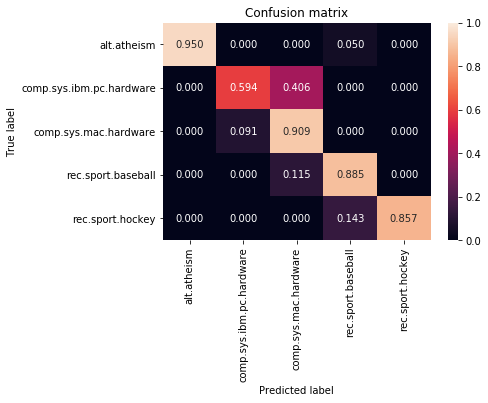

In [20]:
# (1) # Your Code goes here:
Xtest=news_test.drop('class',axis=1)
ytest=news_test['class']
print('NB accuracy on test data= ',round(accuracy_score(y_true=ytest,y_pred=classifier.predict(Xtest)),4))
cmtest=confusion_matrix(ytest,classifier.predict(Xtest))
plot_confusion_matrix(cmtest,classes=['alt.atheism','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware',
'rec.sport.baseball','rec.sport.hockey'])

<div align="right"><font color="blue" size="4">4.0</font></div>

In [21]:
# (2) # Your Code goes here:
mode=news_test['class'].mode().values #extract the mode of the casses of the training dataset.
Xbase=news_test.drop('class',axis=1) #setting the X set to calculate accuracy
ytrues=news_test['class'] #setting the y_true set to calculate accuracy
ybase=np.ones(news_test.shape[0])*mode  #setting the y_pred set to calculate accuracy
print('baseline accuracy on test data = ',round(accuracy_score(y_true=ytrues,y_pred=ybase),4))

baseline accuracy on test data =  0.25


<div align="right"><font color="blue" size="4">2.0</font></div>

(3) ***Your answer goes here:***
The test classification accuracy is (~82% compared to ~87.8% ) lower than the training classification accuracy, which is anticipated considering the classifier was 'trained' with the training data to be able to classify test data better than if it was not 'trained' and has the effect of always predicting something 'close' to the training data(commonly known as **overfitting**).

This decrease was **not** observed for the baseline classifier's accuracy, because probably the test data just had more documents classified as the **mode** class and this resulted in our baseline classifier scoring better.

Our NB classifier, in both the training and test data case, is much better than the baseline classifier, indicating that Naive Bayes is a fairly good classification method for text data, using the conditional independence assumption.
However, there are better methods for text classification (e.g. Support Vector Machines, or even logistic/linear regression which we cover in the second assignment of this coursework).
Generally, the 'bag of words' implementation works smoothly and consistently only up to a certain degree. 

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 2.8 --- (LEVEL 11) --- [7 marks] ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

In [ ]:
# (1) # Your Code goes here:

(2) ***Your answer goes here:***

### ========== Question 2.9 --- (LEVEL 11) --- [3 marks] ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***